In [80]:
# from google.colab import files
# uploaded = files.upload()
# content = 'crop_yield.csv'

In [81]:
import numpy as np
import pandas as pd
import time

In [82]:
from google.colab import drive

drive.mount('/content/drive')
content = '/content/drive/My Drive/Colab Notebooks/Data/data_crop_yield.csv'  # USA data_set
# content = '/content/drive/My Drive/Colab Notebooks/Data/crop_yield.csv' # Indian data_set
df = pd.read_csv(content)
df_encoded = df.copy()
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


# **USA data set encoding**

In [83]:
# # Mean encoding
crop_mean_yield = df_encoded.groupby('Crop')['Yield'].mean()
df_encoded['Crop'] = df_encoded['Crop'].map(crop_mean_yield)

# One-hot encoding
# df_encoded = pd.get_dummies(df, columns=['Crop'])

# **Indian data set encoding**

In [84]:
# # # Mean encoding
# crop_mean_yield = df_encoded.groupby('Crop')['Yield'].mean()
# season_mean_yield = df_encoded.groupby('Season')['Yield'].mean()
# state_mean_yield = df_encoded.groupby('State')['Yield'].mean()
# df_encoded['Crop'] = df_encoded['Crop'].map(crop_mean_yield)
# df_encoded['Season'] = df_encoded['Season'].map(season_mean_yield)
# df_encoded['State'] = df_encoded['State'].map(state_mean_yield)

# # One-hot encoding
# # df_encoded = pd.get_dummies(df, columns=['Crop', 'Season', 'State'])

# **Data set display**

In [85]:
df_encoded

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,8883.128205,2248.92,17.72,83.40,26.01,11560
1,8883.128205,1938.42,17.54,82.11,26.11,11253
2,8883.128205,2301.54,17.81,82.79,26.24,9456
3,8883.128205,2592.35,17.61,85.07,25.56,9321
4,8883.128205,2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,7824.897436,2308.51,18.27,83.65,26.47,6721
152,7824.897436,2410.13,18.58,83.45,26.81,6248
153,7824.897436,2967.41,18.67,85.48,26.46,6842
154,7824.897436,2333.46,18.50,84.85,26.43,5571


# **Check for null value**

In [86]:
df_encoded.isnull().sum()

,0
Crop,0
Precipitation (mm day-1),0
Specific Humidity at 2 Meters (g/kg),0
Relative Humidity at 2 Meters (%),0
Temperature at 2 Meters (C),0
Yield,0


# **Independent variables**

In [87]:
X = df_encoded.drop(columns=['Yield'])
X

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,8883.128205,2248.92,17.72,83.40,26.01
1,8883.128205,1938.42,17.54,82.11,26.11
2,8883.128205,2301.54,17.81,82.79,26.24
3,8883.128205,2592.35,17.61,85.07,25.56
4,8883.128205,2344.72,17.61,84.12,25.76
...,...,...,...,...,...
151,7824.897436,2308.51,18.27,83.65,26.47
152,7824.897436,2410.13,18.58,83.45,26.81
153,7824.897436,2967.41,18.67,85.48,26.46
154,7824.897436,2333.46,18.50,84.85,26.43


# **Dependent variable**

In [88]:
y = df_encoded['Yield']
y

,Yield
0,11560
1,11253
2,9456
3,9321
4,8800
...,...
151,6721
152,6248
153,6842
154,5571


# **Log transformation**

In [89]:
# y = np.log1p(y)

# **Calculate mean and standard deviation for each feature**

In [90]:
means = X.mean()
stds = X.std()

# **Apply standardization**

In [91]:
X_scaled = (X - means) / stds
X = np.c_[np.ones(X_scaled.shape[0]), X_scaled.values]

# **Gradient decent functions for lenear regression**

In [92]:
# Gradient Descent Parameters
m, n = X.shape  # Number of samples (m) and features (n)
coeff = np.zeros(n)
alpha = 0.01
iterations = 800
cost_history = []
start_time = time.time()
# Gradient Descent Function
for i in range(iterations):
    predictions = X.dot(coeff)  # Compute predictions
    errors = predictions - y  # Compute error
    gradient = (1 / m) * X.T.dot(errors)
    coeff -= alpha * gradient  # Update coeff using gradient descent

    # Compute and record cost (Mean Squared Error)
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    cost_history.append(cost)
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")
coeff

Training time: 0.29274773597717285 seconds


array([56135.00237052, 69959.6741812 ,  2505.96552257,  -224.39279593,
       -1450.29056904,   787.0782687 ])

# **Multivariable linear regression**

In [93]:
# coeff = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
# coeff

# **Predict the values of Y using the learned theta**

In [94]:
y_pred = X.dot(coeff)
y_pred

array([  8617.05992042,   8245.80987161,  10585.39459349,   7886.33238617,
         7728.49458538,   7001.43209915,   7513.57169412,   9612.40326983,
         5144.84954621,   6287.40461343,   6935.21431346,   7481.06078704,
         7951.01220487,   7518.43595802,   8810.51248218,   6025.03207001,
         5477.88802299,  10289.39111092,   8905.80577678,   8789.66339979,
         7995.24096085,   7854.81187393,   9356.88645171,   7660.41744705,
         7730.45822755,  10199.89006652,   8723.9313615 ,  11518.56423471,
        11495.33274211,  10888.74930884,  11413.58911054,  11213.61157609,
        10405.46206843,  12545.52457905,   9736.04066968,  11695.41677459,
        12440.81777658,   7908.90920224,   8771.52594048, 175481.9787242 ,
       175110.72867538, 177450.31339727, 174751.25118995, 174593.41338916,
       173866.35090293, 174378.4904979 , 176477.3220736 , 172009.76834999,
       173152.3234172 , 173800.13311724, 174345.97959081, 174815.93100864,
       174383.35476179, 1

In [95]:
mse = np.mean((y_pred - y) ** 2)
rmse = np.sqrt(mse)
rmse

7553.2239714608895

In [96]:
y_intercept = coeff[0]
y_intercept

56135.0023705204

In [97]:
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
r_squared

0.9884217899881422

# **Important stuff**

In [106]:
# print("Y-intercept (coefficient):\n\ttheta 0 --> ", y_intercept)
# print("\nTheta (coefficients)\t\t\tfor\tFeatures (independent variable):")

# feature_names = df_encoded.drop(columns=['Yield']).columns
# count = 1
# for coefficient, feature in zip(coeff[1:], feature_names):
#     print(f"\ttheta {count} --> {round(coefficient, 10)} for {feature}")
#     count += 1
# print("\nRoot Mean Squared Error (RMSE):\n\t", rmse)
# print("\nModel accuracy:\n\t", r_squared)

print(f"Y-intercept (coefficient):\n\ttheta 0 --> {y_intercept} constant_value")
print("\nTheta (coefficients) for Features (independent variable):")

feature_names = df_encoded.drop(columns=['Yield']).columns
count = 1
for coefficient, feature in zip(coeff[1:], feature_names):
    print(f"\ttheta {count} --> {round(coefficient, 10)} for {feature}")
    count += 1
print(f"\nRoot Mean Squared Error (RMSE):\n\t{rmse}")
print(f"\nModel accuracy in training:\n\t{r_squared} or {round((r_squared*100), 2)}%")
print(f"\nTraining time:\n\t{round(training_time, 16)}ms")

Y-intercept (coefficient):
	theta 0 --> 56135.0023705204 constant_value

Theta (coefficients) for Features (independent variable):
	theta 1 --> 69959.674181203 for Crop
	theta 2 --> 2505.9655225745 for Precipitation (mm day-1)
	theta 3 --> -224.3927959251 for Specific Humidity at 2 Meters (g/kg)
	theta 4 --> -1450.2905690428 for Relative Humidity at 2 Meters (%)
	theta 5 --> 787.078268702 for Temperature at 2 Meters (C)

Root Mean Squared Error (RMSE):
	7553.2239714608895

Model accuracy in training:
	0.9884217899881422 or 98.84%

Training time:
	0.2927477359771729ms


In [99]:
feature_names = df_encoded.drop(columns=['Yield']).columns

abs_coefficients = np.abs(coeff[1:])
total_contribution = np.sum(abs_coefficients)
percentage_contributions = (abs_coefficients / total_contribution) * 100

feature_contributions = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeff[1:],
    'Contribution (%)': percentage_contributions
})

print(feature_contributions, "\n")
print("Total contribution", total_contribution)

                                Feature   Coefficient  Contribution (%)
0                                  Crop  69959.674181         93.369946
1              Precipitation (mm day-1)   2505.965523          3.344525
2  Specific Humidity at 2 Meters (g/kg)   -224.392796          0.299480
3     Relative Humidity at 2 Meters (%)  -1450.290569          1.935594
4           Temperature at 2 Meters (C)    787.078269          1.050455 

Total contribution 74927.4013374474


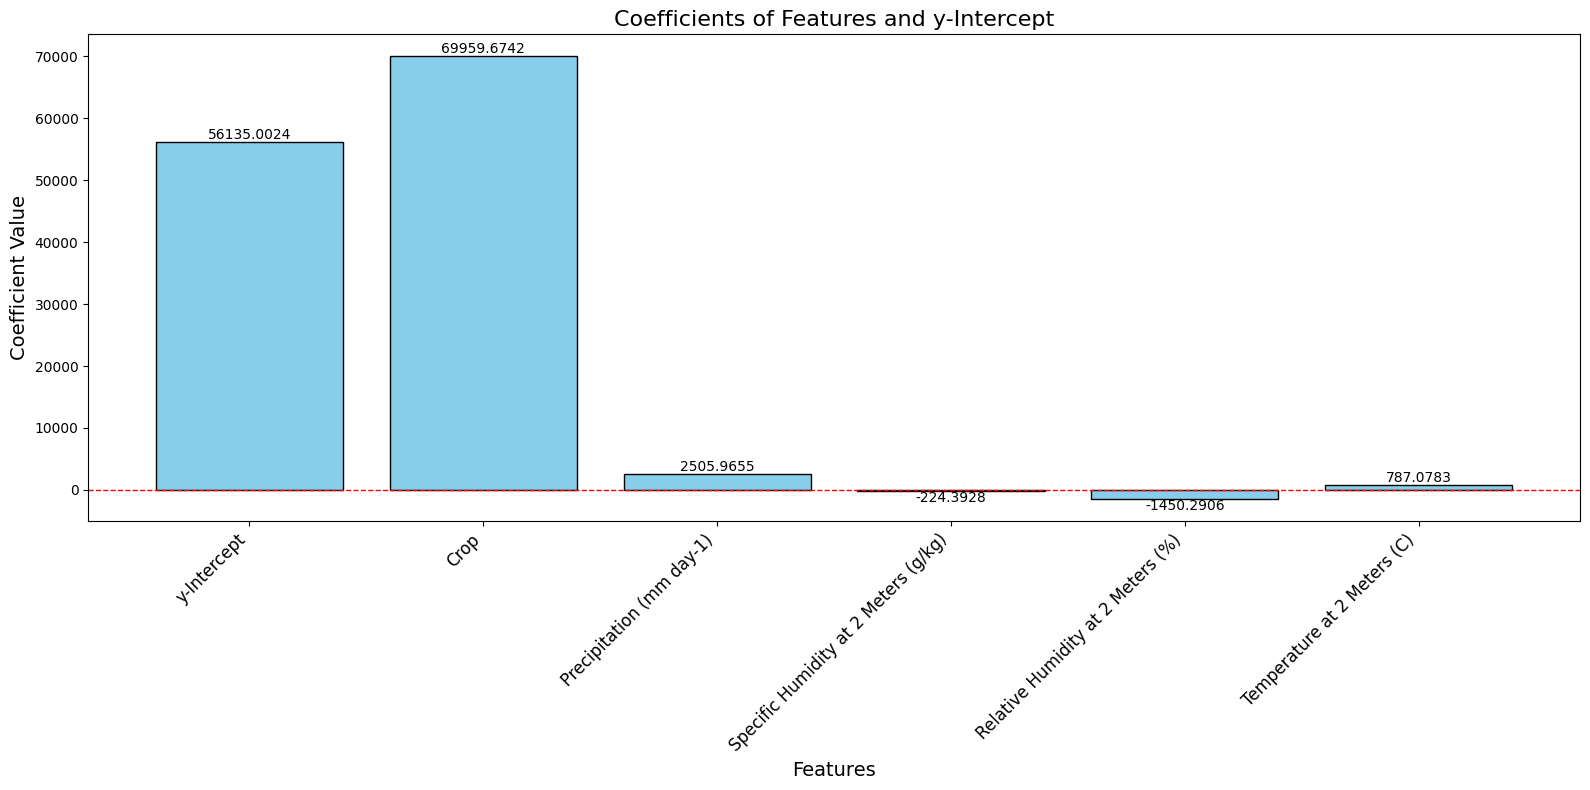

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
bars = plt.bar(["y-Intercept"] + list(feature_names), coeff, color='skyblue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=1)

for bar, value in zip(bars, coeff):
    height = bar.get_height()
    y_offset = 0.1 if height >= 0 else -0.1
    plt.text(bar.get_x() + bar.get_width() / 2, height + y_offset, f"{value:.4f}",
             ha='center', va='bottom' if height >= 0 else 'top', fontsize=10, color='black')

plt.title("Coefficients of Features and y-Intercept", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

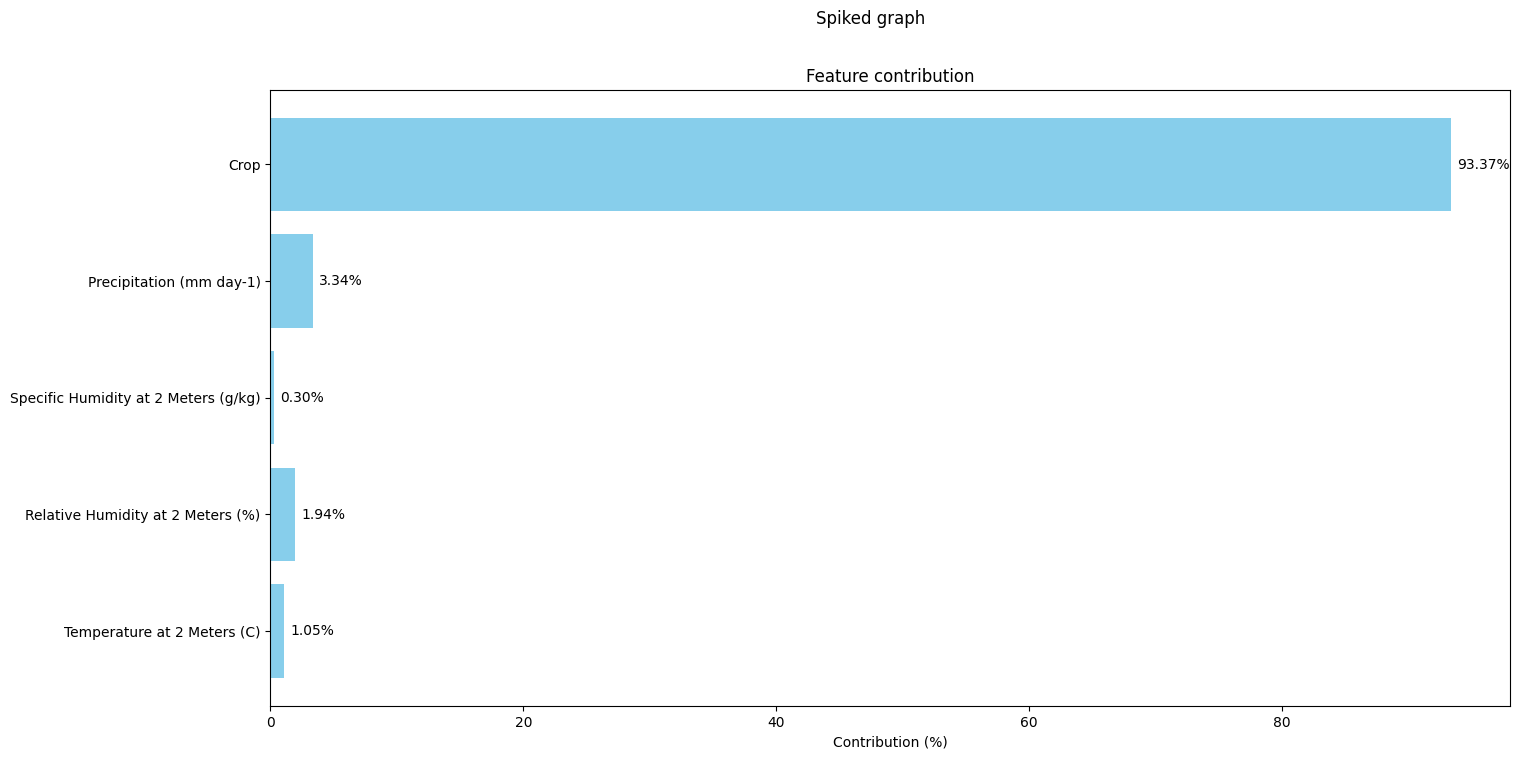

In [101]:
plt.figure(figsize=(16, 8))
bars = plt.barh(feature_contributions['Feature'], feature_contributions['Contribution (%)'], color='skyblue')
plt.suptitle('Spiked graph')
plt.title('Feature contribution')
plt.xlabel('Contribution (%)')
plt.gca().invert_yaxis()

for bar, percentage in zip(bars, percentage_contributions):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{percentage:.2f}%', va='center')
plt.show()

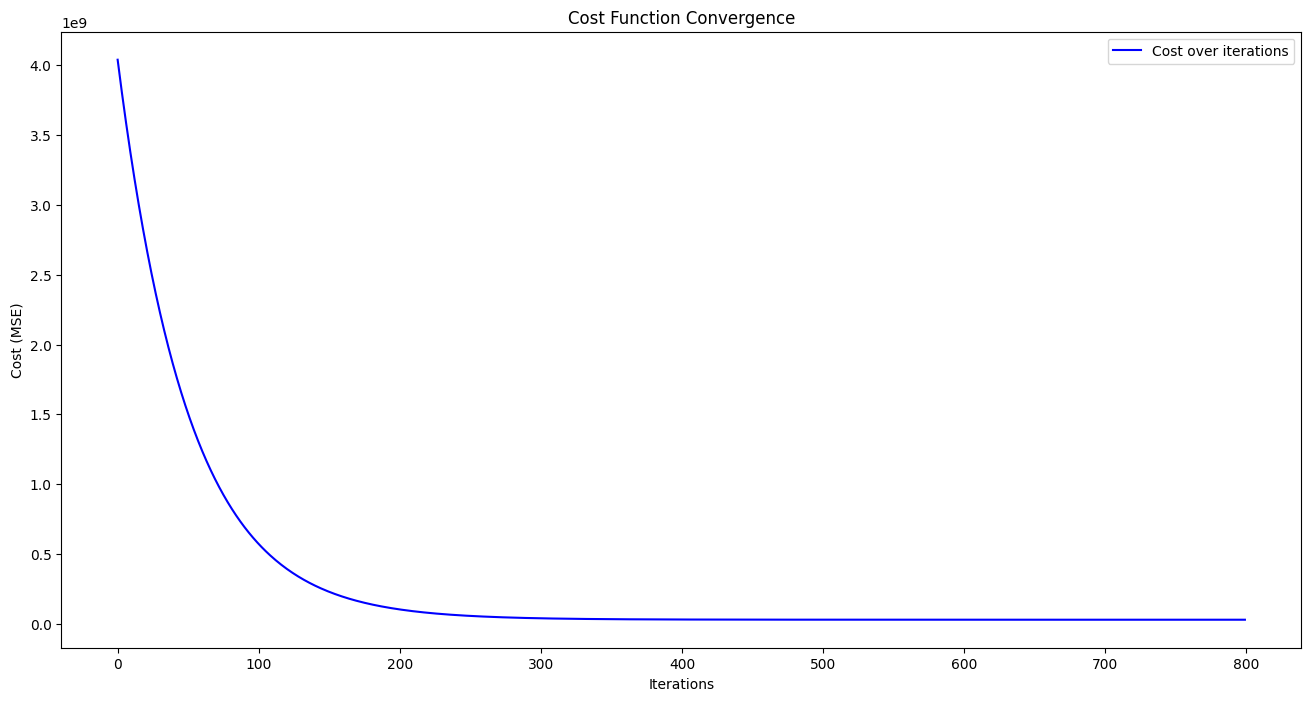

In [102]:
plt.figure(figsize=(16, 8))
plt.plot(range(iterations), cost_history, label='Cost over iterations', color='blue')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.show()

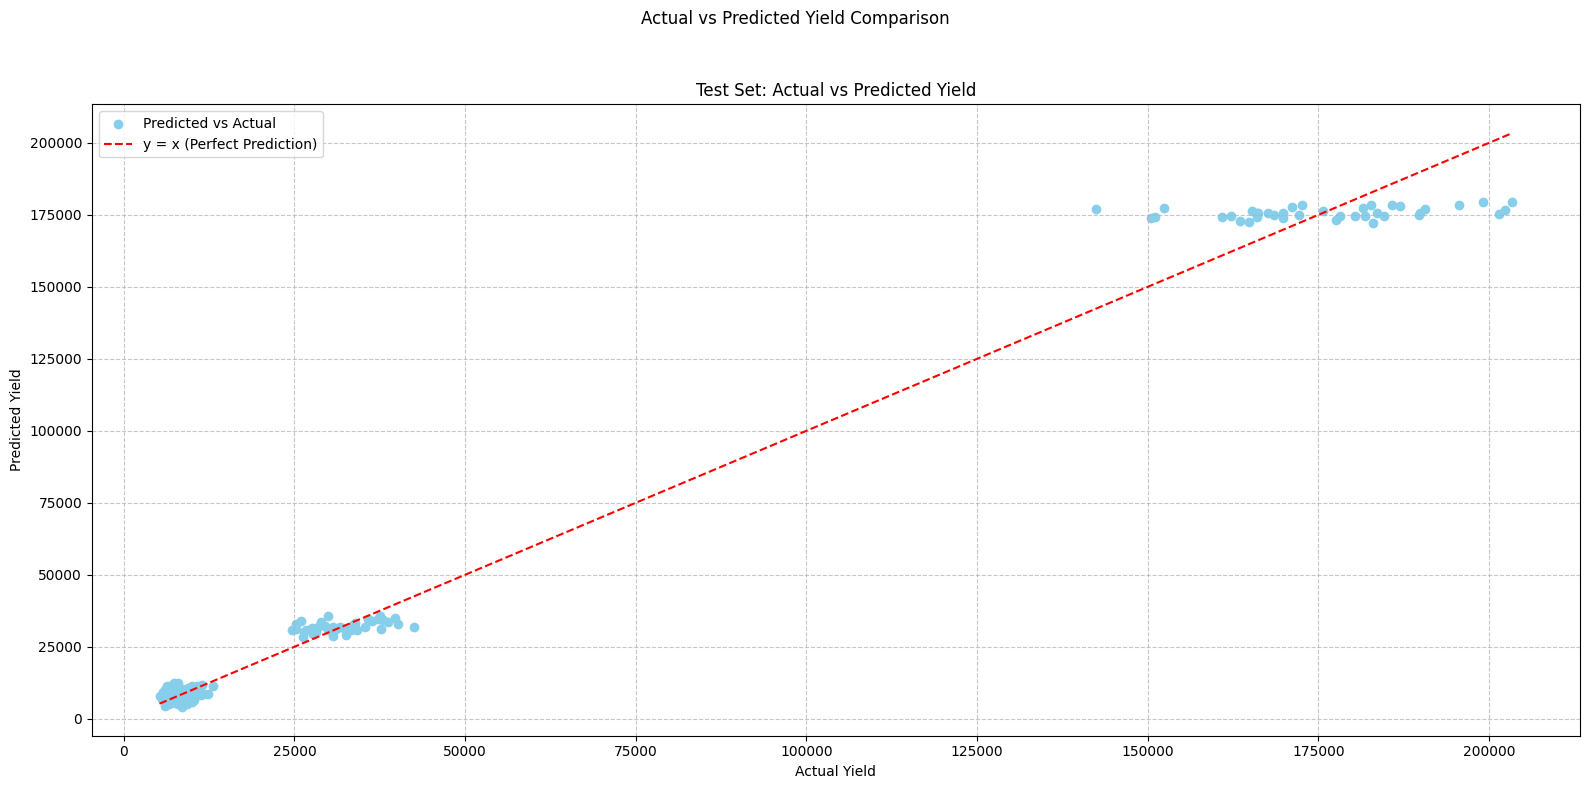

In [103]:
plt.figure(figsize=(16, 8))
plt.scatter(y, y_pred, color="skyblue", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="y = x (Perfect Prediction)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title('Test Set: Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()

plt.suptitle('Actual vs Predicted Yield Comparison')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

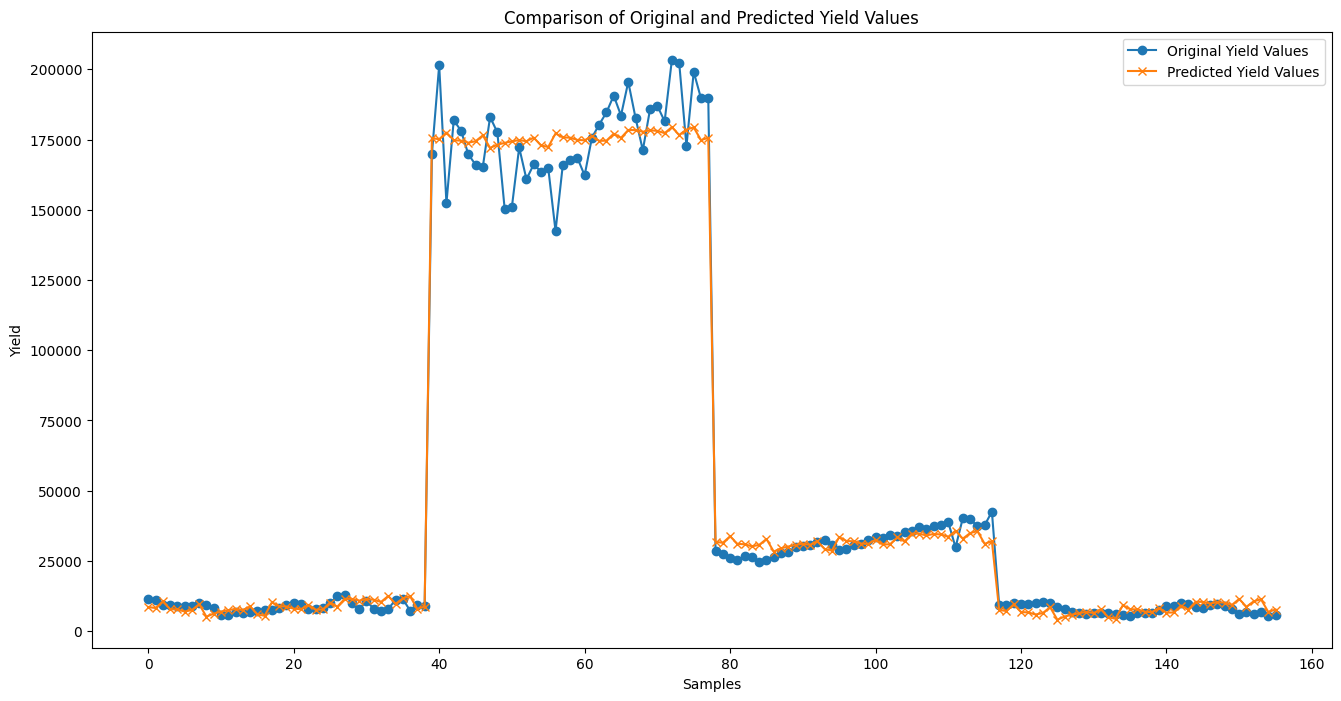

In [104]:
plt.figure(figsize=(16, 8))
plt.plot(y.values, label='Original Yield Values', marker='o')
plt.plot(y_pred, label='Predicted Yield Values', marker='x')
plt.title('Comparison of Original and Predicted Yield Values')
plt.xlabel('Samples')
plt.ylabel('Yield')
plt.legend()
plt.show()

In [105]:
print("Actual vs Predicted Yield Values:")
for actual, predicted in zip(y, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual vs Predicted Yield Values:
Actual: 11560.00, Predicted: 8617.06
Actual: 11253.00, Predicted: 8245.81
Actual: 9456.00, Predicted: 10585.39
Actual: 9321.00, Predicted: 7886.33
Actual: 8800.00, Predicted: 7728.49
Actual: 8850.00, Predicted: 7001.43
Actual: 9003.00, Predicted: 7513.57
Actual: 9880.00, Predicted: 9612.40
Actual: 9201.00, Predicted: 5144.85
Actual: 8300.00, Predicted: 6287.40
Actual: 5765.00, Predicted: 6935.21
Actual: 5812.00, Predicted: 7481.06
Actual: 6667.00, Predicted: 7951.01
Actual: 6530.00, Predicted: 7518.44
Actual: 6912.00, Predicted: 8810.51
Actual: 7138.00, Predicted: 6025.03
Actual: 7525.00, Predicted: 5477.89
Actual: 7663.00, Predicted: 10289.39
Actual: 8300.00, Predicted: 8905.81
Actual: 9274.00, Predicted: 8789.66
Actual: 9956.00, Predicted: 7995.24
Actual: 9801.00, Predicted: 7854.81
Actual: 7965.00, Predicted: 9356.89
Actual: 7919.00, Predicted: 7660.42
Actual: 8226.00, Predicted: 7730.46
Actual: 10062.00, Predicted: 10199.89
Actual: 12362.00, Predic